# Лекция 2. Параметры производительности и оперативности КИС. Основные понятия теории массового обслуживания

- Типовые задачи. Параметры производительности и оперативности КИС
- Общие представления о системах массового обслуживания
- Классификация систем массового обслуживания
- Обозначения СМО (символика Кендалла). Основные определения.
- Преобразование Лапласа-Стилтьеса, производящие функции, их свойства.

## Типовые задачи. Параметры производительности и оперативности КИС

<p style='text-align: justify;'>
При анализе производительности характеристик КИС, как было отмечено, можно использовать разные модели и подходы в зависимости от того, на что направлен такой анализ. В нашем курсе мы будем по большей части представлять КИС, как совокупность параллельно выполняемых (происходящих) процессов, которые взаимодействуют друг с другом, а также в случайные момены времени обращаются к <b>некоторому общему ресурсу</b>. В зависимости от принятого регламента обслуживания такие процессы могут быть поставлены в очередь. С общих позиций понятно, что эффективность функционирования КИС вынуждено снижается, если очередь будет  достаточно длинная. Опишем ряд типовых задач на эту тему:
</p>

<b>Задача производитель - потребитель</b>

<p style='text-align: justify;'>
Имеется большое число вариантов постановки и решения такой задачи в рамках конкретных операционных систем. В общем случае взаимодействуют несколько процессов с жестко распределенными между ними функциями. Одни процессы вырабатывают сообщения, предназначенные для восприятия и обработки другими процессами. Процесс, вырабатывающий сообщения, называют производителем, а воспринимающий сообщения – потребителем. Процессы взаимодействуют через некоторую обобщенную область памяти (буфер), которая по смыслу является критическим ресурсом. В эту область процесс-производитель должен поместить очередное сообщение, а процесс-потребитель должен считывать очередное сообщение.
</p>

Необходимо согласовать работу процессов при обмене сообщениями таким образом, чтобы удовлетворить следующим требованиям:

- попытка процесса-производителя поместить очередное сообщение в область, из которой не было считано предыдущее сообщение процессом-потребителем, должна быть блокирована. В этом случае процесс производитель должен быть либо оповещен о невозможности помещения сообщения; либо переведен в состояние ожидания возможности поместить очередное сообщение через некоторое время в область памяти, по мере ее освобождения;
- попытка процесса-потребителя считать сообщение из области в ситуации, когда процесс-производитель не поместил туда очередного сообщения, должна быть заблокирована. Процесс потребитель должен быть: либо оповещен о невозможности считывания сообщения; либо переведен в состояние ожидания поступления очередного сообщения;
- если используется вариант с ожиданием изменения состояния обобщенной области для хранения сообщений, необходимо обеспечить перевод ожидающих процессов в состояние готовности всякий раз, когда изменится состояние области: либо процесс-производитель поместит очередное сообщение в область, и оно теперь может быть считано ожидающим процессом-потребителем; либо процесс потребитель считал очередное сообщение из области и обеспечил возможность ожидающему процессу-производителю послать очередное сообщение.

**Задача читатели - писатели**

Имеется система параллельных процессов, которые взаимодействуют друг с другом следующим образом:
- все процессы делятся на два типа: процессы-читатели и процессы-писатели. Процессы работают с общей областью памяти;
- процессы-читатели считывают, а процессы-писатели записывают информацию в общую область памяти;
- одновременно может быть несколько активных процессов-читателей;
- при записи информации область памяти рассматривается как критический ресурс для всех процессов, то есть, если работает процесс-писатель, то он должен быть единственным активным процессом.

Задача состоит в определении структуры управления, которая не приведет к тупику и не допустит нарушения критерия
взаимного исключения. Наиболее характерная область использования этой задачи – построение файловых систем.

1. процессы-читатели, которые считывают одновременно информацию из области, если это допускается при работе с конкретным устройством памяти;
2. процессы-писатели, которые записывают информацию в область и могут делать это, только исключая как друг друга, так и процессы-читатели, то есть запись должна удовлетворяться на основании решения задачи взаимного исключения.

Имеются различные варианты взаимодействия между процессами-писателями и процессами-читателями. Наиболее широко распространены следующие:
- устанавливается высшая приоритетность в использовании критического ресурса процессам-читателям (если хотя бы один процесс-читатель пользуется ресурсом, то он закрыт для использования всеми процессами-писателями);
- наивысший приоритет у процессов-писателей (при появлении запроса от процесса-писателя необходимо закрыть ресурс для использования процессами-читателями).

**Задача обедающих философов**

<p style='text-align: justify;'>
В рамках этой задачи формулируются требования на синхронизацию работы процессов, которые совместно используют пересекающиеся группы ресурсов.</p>
<p style='text-align: justify;'>
За круглым столом расставлены стулья, на каждом из которых сидит определенный философ.
Каждый философ может находиться только в двух состояниях – либо он размышляет, либо ест спагетти. Начать думать философу ничто не мешает. Но чтобы начать есть, философу нужны две вилки: одна в правой руке, другая в левой. Закончив еду, философ кладет вилки слева и справа от своей тарелки и опять начинает размышлять до тех пор, пока снова не проголодается.</p>

<p style='text-align: justify;'>
Существует множество различных формулировок данной задачи, в одной из которых философы интерпретируются как процессы, а вилки – как ресурсы.</p>

В представленной задаче имеются две опасные ситуации: ситуация голодной смерти и ситуации голодания отдельного философа. 
<p style='text-align: justify;'>
Ситуация голодной смерти возникает в случае, когда философы одновременно проголодаются и одновременно попытаются взять свои правую и левую вилки. В данном случае возникает тупиковая ситуация, так как никто из них не может начать есть. Для исключения ситуации голодной смерти были предложены различные стратегии распределения вилок.</p>
<p style='text-align: justify;'>
Ситуация голодания возникает в случае заговора двух соседей слева и справа против философа, в отношении которого
строятся козни. Заговорщики поочередно забирают вилки то слева, то справа от него. Такие согласованные действия злоумышленников приводят жертву к вынужденному голоданию, так как он никогда не может воспользоваться обеими вилками.
</p>

Для анализа конфликтных ситуаций, анализа производительности, оперативности  КИС используют аппарат теории массового обслуживания, сетей Петри.

Среди **параметров производительности и оперативности** выделяют следующие:

- Время на решение заданного набора задач (для систем, работающих в режиме пакетной обработки); время реакции системы (для систем, работающих в режиме «запрос/ответ» или диалога).
- Абсолютная и относительная пропускная способность.
- Длины очередей к совместно используемым ресурсам.
- Аналогичные параметры отдельных составных частей системы (статистические характеристики некоторых случайных величин: моменты функций распределения этих случайных величин – математическое ожидание, дисперсия, иногда моменты более высокого порядка.

Далее, в основном, будут рассматриваться методы оценки и расчета таких параметров как время реакции и пропускная способность системы.

**Время реакции системы на запрос**  - среднее время от момента нажатия пользователем клавиши «Ввод» на клавиатуре персонального компьютера до момента появления на экране первого символа ответа.

**Пропускная способность системы** -  среднее число задач, которые система способна решить в единицу времени.

Время реакции системы на запрос пользователя зависит от многих факторов.

Наряду с величинами, определяемыми только техническими характеристиками устройств (быстродействие процессоров, скорость записи-чтения информации с диска) и характеристиками инициированной данным запросом задачи, время реакции системы включает задержки, связанные с ожиданием освобождения ресурсов, занятых в это время обработкой запросов других пользователей. 

Значение этих задержек зависит от количества пользователей в системе, порядка просмотра очередей и других факторов, связанных с взаимодействием запросов и ресурсов.

Таким образом, при анализе времени задержек возникают две основные проблемы.

1. Правильно представить последовательность прохождения запроса в системе, не упустив при этом никакие важные компоненты и не увязнув в несущественных деталях.
2. Оценить задержки, связанные с конкуренцией запросов к ресурсам.

Эти проблемы и решаются в процессе построения и исследования математической модели.

Также время реакции системы на запрос включает в себя задержки в очередях, связанные со случайным характером поступления
запросов в систему, случайными маршрутами прохождения запросов внутри множества ресурсов системы, случайными временами их обработки отдельными ресурсами.

Математический аппарат, позволяющий строить модели, связанные с процессами образования очередей, разрабатывается в теории массового обслуживания. 

Методы теории массового обслуживания позволяют вывести соотношения, связывающие значения выходных параметров (например, времени реакции или пропускной способности) с некоторыми параметрами, обобщенно описывающими элементы СМО или ее структуру (моментами функций распределения длительности обслуживания, интенсивностями входных потоков заявок, вероятностями перехода между узлами стохастической сети и т.д.).

В соответствии с этой теорией в формализованном представлении исследуемой системы всегда присутствуют следующие компоненты.

- Потоки заявок на использование ресурсов системы.
- Обслуживающие аппараты, отображающие программные и/или аппаратные ресурсы (иногда встречаются так называемые «составные ресурсы»), с помощью которых обрабатываются заявки.
- Очереди к обслуживающим аппаратам.

## Общие представления о системах массового обслуживания

<p style='text-align: justify;'>
На практике приходится работать с системами, которые используются многократно при решении однотипных задач. Возникающие при этом процессы получили название <b>процессов обслуживания</b>, а системы  - <b>систем массового обслуживания (СМО)</b> (в англоязычных источниках употребляется термин queuering theory - теория очередей). Основоположником теории массового обслуживания считают датского ученого Эрланга, который работал в шведской телефонной компании и занимался вопросами проектирования телефонных сетей.</p>

<p style='text-align: justify;'>
В дальнейшем теория получила широкое распространенние в самых разных областях человеческой деятельности: техника, военное дело, экономика, производство и др. Такая потребность была продиктована тем, что во всех этих областях возникает классическая постановка задачи теории массового облуживания: имеется общий ресурс и поток заявок на обслуживание, вследствие ограниченности ресурса заявки вынуждены стоять в очереди, или получать отказ. Таким образом возникает потребность понять объективные причины задержек или отказов и нивелировать их негативное воздействие.</p>

Примерами таких систем могут быть: телефонные линии, вычислительные комплексы, магазины, склады и т.д.

СМО считается заданной, если полностью описаны следующие ее компоненты:
- входящий поток запросов (заявок, вызовов, сообщений);
- количество и типы обслуживающих устройств (приборов, каналов);
- емкости накопителей (буферов), где запросы, заставшие все каналы занятыми, ожидают начала обслуживания;
- время обслуживания запросов в каналах;
- дисциплина обслуживания (она определяет порядок обработки запроса в системе, начиная с момента его поступления в систему и до момента, когда он покидает СМО).



В качестве характеристик эффективности функционирования СМО выделяют следующие группы показателей:

*Показатели эффективности использования СМО*

- Абсолютная пропускная способность СМО - среднее число заявок, которое сможет обслужить СМО в единицу времени.
- Относительная пропускная способность СМО - отношение среднего числа заявок, обслуживаемых СМО в единицу времени, к среднему числу поступивших за это же время заявок.
- Средняя продолжительность периода занятости СМО. 
- Коэффициент использования СМО - средняя доля времени, в течение которого СМО занята обслуживанием заявок.

*Показатели качества обслуживания заявок*

- Среднее время ожидания заявки в очереди.
- Среднее время пребывания заявки в СМО.
- Вероятность отказа заявке в обслуживании без ожидания.
- Вероятность поступившей заявки к немедленному принятию на обслуживание.
- Закон распределения времени нахождения заявки в очереди.
- Закон распределенния времени пребывания заявки в СМО.
- Среднее число заявок, находящихся в очереди.
- Среднее число заявок, находящихся в СМО.

**Системой массового обслуживания** называется любая система для выполнения заявок, поступающих в нее в случайные моменты времени. 

Поступление заявки в СМО называется **событием**. Последовательность событий, заключающихся в поступлении заявок в СМО, называется **входящим потоком заявок**.

Последовательность событий, заключающихся в выполнении заявок в СМО, называется **выходящим потоком заявок**.



## Классификация систем массового обслуживания

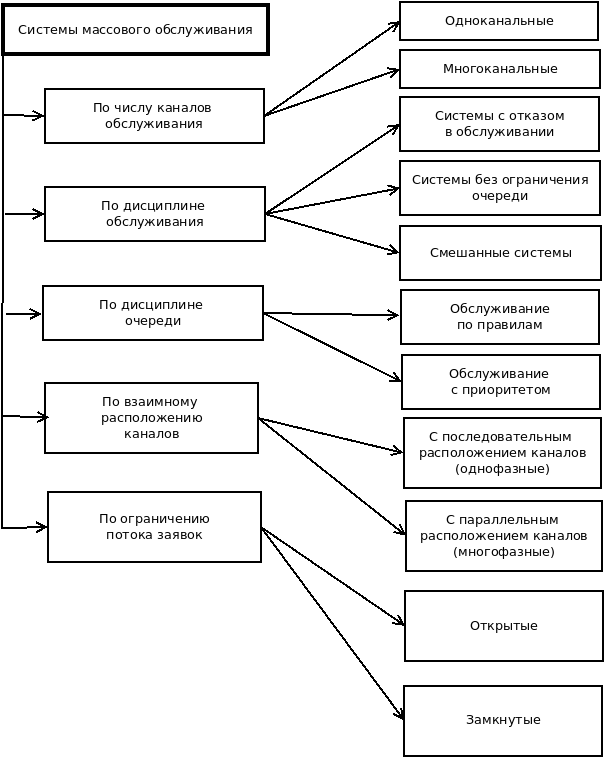

Как видно из рисунка, СМО можно классифицировать по количеству каналов обслуживания на *одноканальные*, *многоканальные* системы. Многоканальные системы могут состоять из однородных каналов либо из разнородных, отличающихся длительностью обслуживания одной заявки.

По дисциплине обслуживания выделяют:
- *системы с отказом в обслуживании* - это такие системы, в которых образование очереди невозможно, т.е. если заявка пришла в тот момент, когда все каналы заняты, она получает отказ в обслуживании. Примером СМО с отказами может служить работа АТС: если набранный телефонный номер (заявка, поступившая на вход) занят, то заявка получает отказ, и, чтобы дозвониться по этому номеру, следует его набрать еще раз (заявка поступает на вход как новая).
- *системы без ограничения*  - в таких системах очередь может расти без ограничения. Заявка, поступившая в момент занятости всех каналов, становится в очередь и ожидает освобождения канала, который примет ее к обслуживанию. Каждая заявка, поступившая на вход, в конце концов будет обслужена. Такие СМО часто встречаются в торговле, в сфере бытового и медицинского обслуживания, на предприятиях (например, обслуживание станков бригадой наладчиков).
- *смешанные системы* - это такие системы, в которых на пребывание заявки в очереди накладываются некоторые ограничения. Эти ограничения могут накладываться на длину очереди, т.е. максимально возможное число заявок, которые одновременно могут находиться в очереди. В качестве примера такой системы можно привести мастерскую по ремонту автомобилей, имеющую ограниченную по размерам стоянку для неисправных машин, ожидающих ремонта. Ограничения ожидания могут касаться времени пребывания заявки в очереди, по истечении которого она выходит из очереди и покидает систему, либо касаться общего времени пребывания заявки в СМО (т.е. суммарного времени пребывания заявки в очереди и обслуживании).

В зависимости от дисциплины очереди выделяют системы *с обслуживанием по приоритетам*, *с обслуживанием по правилам*.

Приоритеты в обслуживании делятся на:
- *абсолютный приоритет* - если приходят заявки с высшим приоритетом, они тут же начинают обслуживаться, все остальные заявки получают в этот момент отказ в обслуживании.
- *относительный приоритет*, у каждой заявки есть свой приоритет по отношению к другим, заявки с меньшим приоритетом ожидают в очереди окончания обслуживания заявок в более высоким приоритетом.
- *специальные правила приоритета* - приоритет в обслуживании оговаривается в виде выполнения системы условий (простейший пример, ветераны ВОВ обслуживаются вне очереди).

Обслуживание по правилам включает следующие правила:
 - *первый пришел - первый обслужен* (FIFO) - это естественная дисциплина очереди.
 - *последний пришел - первый обслужен* (LIFO) - принцип стека.
 - *обслуживание при случайном отборе заявок из очереди.*
 
 По ограничению потока заявок СМО делятся на *замкнутые и открытые*. Если поток заявок ограничен и заявки, покинувшие систему, могут в нее возвращаться, то СМО является замкнутой, в противном случае – открытой. Классическим примером замкнутой СМО служит работа бригады наладчиков в цеху. Станки являются источниками заявок на обслуживание, и их количество ограничено,
наладчики – каналы обслуживания. После проведения ремонтных работ вышедший из строя станок снова становится источником заявок на обслуживание. В открытой СМО характеристики потока заявок не зависят от того, в каком состоянии сама СМО (сколько
каналов занято). В замкнутой СМО – зависят. Так, в рассмотренном выше примере интенсивность потока «заявок» со стороны
станков (т.е. количество заявок в единицу времени) зависит от того, сколько их неисправно и ждет наладки.
 
 Наконец, в зависимости от взаимного расположенния каналов системы также делятся на два типа:
 - *системы с параллельным расположением каналов (однофазные)* - в таких системах обслуживание заявок может вести любой свободный канал, СМО однородны, т.е. выполняют одну и ту же операцию обслуживания.
 - *системы с последовательным расположением каналов (многофазные)*  - в таких системах обслуживание ведут несколько каналов, причем каждый последующий может приступить к обслуживанию только после того, как обслуживание завершил предыдущий канал. Здесь  каналы обслуживания неоднородны, так как выполняют различные операции обслуживания (т.е. обслуживание состоит из нескольких последовательных этапов или фаз). Примером работы многофазной СМО является обслуживание автомобилей на станции технического обслуживания (мойка, диагностирование и т.д.).

## Обозначения СМО (символика Кендалла). Основные определения.

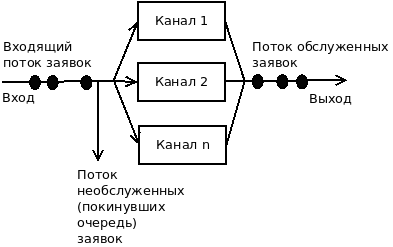

На рисунке показана основная схема СМО. Для удобного обозначения различных особенностей СМО Кендаллом было придумано специальное обозначение в виде:
$$A/B/N/L$$

Здесь $A$ задает закон распределения случайной величины моментов времени поступления заявок в систему.

$B$ задает закон распределения для случайной величины длительностей обслуживания заявок в каналах.

$N$ определяет число обслуживающих каналов в системе $(N=1, 2, 3,\ldots, \infty)$.

$L$ определяет число мест в очереди ($L=0, 1, 2, \ldots, \infty$), если $L$ не указана, то допускается очередь неограниченной длины.

Для задания законов распределения $A, B$ используются следующие обозначения:

$G$ (General) - произвольное распределение общего вида;

$M$ (Markovian) - экспоненциальное (показательное) распределение;

$D$ (Deterministik) - детерминированное распределение;

$U$ (Uniform)  - равномерное распределение;

$E_k$ (Erlangian) - распределение Эрланга $k$-го порядка;

$h_k$ (hipoexponential) - гипоэкспоненциальное распределение $k$-го порядка;

$H_r$ (Hiperexponential) - гиперэкспоненциальное распределение $r$-го порядка;

$g$ (gamma) - гамма-распределение;

$P$ (Pareto)  - распределенние Парето.

Например, 

$M/M/1$ - одноканальная СМО с неограниченной очередью, в которую поступает однородный поток заявок с экспоненциальным распределением интервалов времени между последовательными заявками и экспоненциальной длительностью обслуживания заявок в каналах.

### Простейший поток

Введем основные определения. 

Во-первых, определимся, что понимается под входным потоком событий (заявок, запросов, требований и т.д.). 

Будем считать, что запросы поступают в систему в случайные моменты времени $t_1, t_2, t_3, \ldots$. Обозначим через $\tau_k=t_k-t_{k-1}$ - длины интервалов времени между моментами поступления $(k-1)$-го и $k$-го событий, $k\geq 1, t_0=0$. Пусть $x_{t_k}$ - это число событий, произошедших в течение интервала времени $[t_0,t_k]$

Случайный поток считается заданным, если заданы совместные распределения величин $\tau_k, x_{t_k}$ при $k=1,2,\ldots,n$.

**Определение 1.** *Случайный поток называется **стационарным**, если для любого целого $m$ совместное распределение величин $(x_{t_{k+m}}-x_{t_k})$ не зависит от величины $t_k$.*

Это означает, что распределение число запросов в течение любого интервала времени не зависит от расположения этого интервала на временной оси, а зависит только от длины этого интервала. Таким образом, для стационарного потока среднее число событий в единицу времени должно оставаться постоянной величиной. Конечно, поток может иметь местные уплотнения, разрежения, но для стационарного потока они не носят закономерный характер.

На практике чаще всего потоки можно считать стационарными только на ограниченном отрезке времени. Например, суммарное количество звонков в утренние часы с 8 до 10 ч. для заданного мобильного оператора можно считать примерно одинаковым, однако тот же поток в течение суток уже не будет стационарным (ночью интенсивность потока вызовов гораздо меньше, чем днем).

**Определение 2.** *Случайный поток называется **ординарным**, если для любого момента времени $t$ имеет место соотношение:
$$\lim_{\Delta\rightarrow 0}\frac{P(x_{t+\Delta}-x_t>1)}{\Delta}=0$$*

Содержательно это означает, что вероятность поступления за малый интервал времени более одной заявки есть величина большего порядка малости, чем длина этого интервала. Т.е. события в потоке приходят по одному, а не группами (практически невозможно поступление двух и более запросов).

**Определение 3.** *Если условная вероятность наступления $m=x_{t}-x_{t_k}$ событий $P(m=x_{t}-x_{t_k},t>t_k|n=x_{t_k}-x_T,T<t_k)$ за промежуток времени $t-t_k$, вычисленная при любом предположении о чередовании событий до момента $t_k$, равна безусловной вероятности $P(m=x_{t}-x_{t_k},t>t_k)$ того же события:*
$$P(m=x_{t}-x_{t_k},t>t_k|n=x_{t_k}-x_T,T<t_k)=P(m=x_{t}-x_{t_k}),t>t_k, \forall T,n,t,k,t_k$$
*то такой случайный поток называется **потоком без последействия**.*

Например, поток запросов в интернет-магазине, поступающий от разных покупателей можно считать потоком без последействия, поскольку причины, обуславливающие поступление запроса от конкретного покупателя именно в данный момент времени, как правило, не связаны с причинами для других покупателей.

**Определение 4.** *Случайный стационарный ординарный поток без последействия называется **простейшим**.*

Простейший поток выполняет среди других потоков особую роль. Оказывается, при суперпозиции (взаимном наложении) достаточно большого числа потоков, обладающих последействием (но стационарных и ординарных), образуется суммарный поток, который можно аппроксимировать простейшим потоком и тем точнее, чем большее число потоков объединяется.

Введем важную характеристику случайного потока.

**Определение 5.** ***Интенсивностью $\lambda$** стационарного случайного потока называется математическое ожидание (среднее значение) числа запросов, поступающих в потоке в единицу времени:*
 $$\lambda=\frac{M(x_{k+m}-x_k)}{t_{k+m}-t_k}$$
 
Простейший поток также называют *пуассоновским процессом*, так как он тесно связан с распределением Пуассона. Справедлива следующая теорема:

**Теорема 1.** *Для того, чтобы поток был простейшим, необходимо и достаточно, чтобы он был стационарным пуассоновским:*
$$P(x_{k+m}-x_k=n)=\frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}, n\geq 0, \tau=t_{k+m}-t_{k}$$

**Доказательство.** 
Предположим, что мы имеем простейший поток, отметим на оси Ox случайное распределение точек. Поскольку поток стационарный, то вероятность попадания точек на отрезок длиной $\tau=t_{k+m}-t_k$ зависит только от длины этого отрезка и не зависит от его положения по оси Ox (т.е. точки распределены с одинаковой средней плотностью). Обозначим математическое ожидание числа точек на единице длины через $\lambda$.

Поскольку поток без последействия, точки распределяются по оси Ox независимо друг от друга, т.е. события попадания того или иного числа точек на непересекающиеся отрезки независимы.

<font size=1>
Вспомогательные сведения (повторение опытов).
    
Производится $n$ независимых опытов, в каждом из которых может появиться или не появиться некоторое событие $A$. Вероятность появления события $A$  равна $p$, а вероятность непоявления $q=1-p$. Требуется найти вероятность $P_{m,n}$ того, что в $n$ опытах событие $A$ появится ровно $m$ раз. Количество способов выбрать $m$ раз событие $A$ из $n$ опытов равно $\binom{n}{m}$, вероятность, что в $n$ опытах $m$ раз выпадет событие $A$ и $n-m$ выпадет событие не A равна $p^m(1-p)^{n-m}$. Тогда суммарная вероятность равна $$P_{m,n}=\binom{n}{m}p^m(1-p)^{n-m}$$ 
Данное распределение носит название *биномиальное распределение*.
</font>


Зададимся вопросом: какова вероятность $P_n$ того, что на отрезок $\tau=t_{k+m}-t_k$ попадет ровно $n$ точек.

Разобьем временной отрезок $\tau$ на $h$ равных частей: $\Delta=\frac{\tau}{h}$. Поскольку поток ординарный, то при достаточно большом $h$ вероятность, что в интервал $\Delta$ попадет более одного события равна практически нулю. Поэтому мы может считать, что на таком отрезке $\Delta$ возможно только два исхода - пришла одна заявка, не пришло ни одной заявки. Вероятность, что придет заявка пропорциональна длине отрезка $\Delta$ и интенсивности $\lambda$: $p=\lambda\cdot \Delta=\frac{\lambda\tau}{h}$. Тогда мы попадает под условие повторения опытов:
 $$P_{n,h}=\binom{h}{n}\left(\frac{\lambda \tau}{h}\right)^{n}\left(1-\frac{\lambda\tau}{h}\right)^{h-n}$$
 
 Для того, чтобы найти $P_n$, перейдем к пределу:
 
 $$P_{n}=\lim_{h\rightarrow\infty}\binom{h}{n}\left(\frac{\lambda \tau}{h}\right)^{n}\left(1-\frac{\lambda\tau}{h}\right)^{h-n}$$

Выполним преобразования:

$$P_n=\lim_{h\rightarrow\infty}\binom{h}{n}\left(\frac{\lambda \tau}{h}\right)^{n}\left(1-\frac{\lambda\tau}{h}\right)^{h-n}=\lim_{h\rightarrow\infty}\frac{h!}{n!(h-n)!}\frac{(\lambda \tau)^n}{h^n}\frac{\left(1-\frac{\lambda\tau}{h}\right)^{h}}{\left(1-\frac{\lambda\tau}{h}\right)^{n}}$$

$$P_n=\lim_{h\rightarrow\infty}\frac{h!}{h^n(h-n)!}\frac{(\lambda \tau)^n}{n!}\frac{\left(1-\frac{\lambda\tau}{h}\right)^{h}}{\left(1-\frac{\lambda\tau}{h}\right)^{n}}=\lim_{h\rightarrow \infty}\frac{h(h-1)\ldots(h-n+1)}{h^n}\frac{(\lambda \tau)^n}{n!}\left(\left(1-\frac{\lambda\tau}{h}\right)^{\frac{h}{\lambda\tau}}\right)^{\lambda\tau}$$

Окончательно получаем:
$$P_n=\frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}$$

Последнее соотношение известно как распределение Пуассона дискретной случайной величины. Таким образом, доказали, что если имеем простейший поток заявок, то он необходимо имеет распределение Пуассона.

Покажем, теперь, что распределение Пуассона обладает ординарностью.

При малых $x$ из разложения функции $e^{-x}$ имеем:

$$e^{-1}=1-x+\frac{x^2}{2!}-\frac{x^3}{3!}+\ldots=1-x+o(x)$$
Возьмем $\tau\rightarrow 0$, тогда:
$$P_0=e^{-\lambda\tau}=1-\lambda\tau+o(\tau)$$
$$P_1=\lambda\tau(1-\lambda\tau+o(\tau))=\lambda\tau+o(\tau)$$
$$P_0+P_1=1-\lambda\tau+\lambda\tau+o(\tau)=1+o(\tau)$$
Таким образом, на малом интервале возможно не более  одной заявки с вероятностью 1, что как раз характеризует ординарный поток. ч.т.д.

Рассмотрим пример.

**Пример 1.** На телефонную станцию поступает простейший поток вызовов с интенсивностью λ = 1.2 вызовов в 1 мин.
Найти вероятность того, что за 2 мин:
- не придет ни одного вызова;
- придет ровно один вызов;
- придет хотя бы один вызов.

**Решение.**

- не придет ни одного вызова:
$$P_0=e^{-\lambda\tau}=e^{-1.2\cdot 2}\approx 0.091$$
- придет ровно один вызов:
$$P_1=\frac{\left(\lambda \cdot \tau\right)^1}{1!}e^{-\lambda\cdot \tau}=1.2\cdot 2\cdot 0.091\approx 0.22$$
- придет хотя бы один вызов:
$$1-P_0\approx 1-0.091=0.909.$$

Проведем для данной системы моделирование в среде R.

In [3]:
library(stats)
n<-300000
lambda=1.2
tau<-2
a<-lambda*tau
#Функция rpois из пакета stats генерит случайные числа, распределенные по закону Пуассона с параметром a=lambda*tau
x<-rpois(n,a)
print(length(x[x==0])/n)
print(length(x[x==1])/n)
print(length(x[x>=1])/n)

[1] 0.09093
[1] 0.2174933
[1] 0.90907


Найдем теперь основные характеристики случайной величины, распределенной по закону Пуассона: математическое ожидание и дисперсию.

По определению математического ожидания для дискретной случайной величины:

$$M[X]=\sum_{k=0}^N p_k\cdot x_k$$
где $p_k$ - вероятность, с которой появляется значение $x_k$

Поэтому в нашем случае:
$$M[X]=\sum_{n=0}^\infty n\cdot P_n=\sum_{n=0}^\infty n\cdot \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}=e^{-\lambda\cdot \tau}\cdot \lambda \cdot \tau\cdot \sum_{n=1}^\infty\frac{\left(\lambda \cdot \tau\right)^{n-1}}{(n-1)!}=e^{-\lambda\cdot \tau}\cdot \lambda \cdot \tau\cdot e^{\lambda \cdot \tau}=\lambda \cdot \tau$$

Вычисление дисперсии для дискретной случайной величины выполняется по формуле:
$$D[X]=\sum_{k=0}^N p_k\cdot (x_k-M[X])^2$$

В нашем случае имеем:
$$D[X]=\sum_{n=0}^\infty (n-M[X])^2\cdot \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}=\sum_{n=0}^\infty n^2 \cdot \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}-2M[X]\sum_{n=0}^\infty n \cdot \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}+M[X]^2\cdot \sum_{n=0}^\infty \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}$$

$$D[X]=e^{-\lambda\cdot \tau}\sum_{n=0}^\infty n \cdot \frac{\left(\lambda \cdot \tau\right)^n}{(n-1)!}-2M[X]^2+M[X]^2e^{\lambda\tau}e^{-\lambda\tau}=e^{-\lambda\cdot \tau}\sum_{n=0}^\infty \left((n-1)+1\right)\cdot \frac{\left(\lambda \cdot \tau\right)^n}{(n-1)!}-M[X]^2=e^{-\lambda\cdot \tau}\left(\sum_{n=1}^\infty (n-1)\cdot \frac{\left(\lambda \cdot \tau\right)^n}{(n-1)!}+\sum_{n=1}^\infty  \frac{\left(\lambda \cdot \tau\right)^n}{(n-1)!}\right)-M[X]^2=e^{-\lambda\cdot \tau}\left((\lambda\tau)^2\sum_{n=2}^\infty \frac{\left(\lambda \cdot \tau\right)^{n-2}}{(n-2)!}+\lambda\tau e^{\lambda\tau}\right)-M[X]^2$$

$$D[X]=e^{-\lambda\tau}\left(M[X]^2e^{\lambda\tau}+M[X]e^{\lambda\tau}\right)-M[X]^2=M[X]=\lambda\tau$$

Мы получили, что дисперсия случайной величины, распределенной по закону Пуассона, равна ее математическому ожиданию. Это свойство можно использовать для проверки гипотезы о том, что заданная случайная величина имеет распределение Пуассона - если на экспериментальных данных оценки дисперсии и мат.ожидания примерно равны, то это указывает в пользу закона распределения Пуассона.

Продемонстрируем выполнение этого свойства в эксперименте:

In [4]:
library(stats)
lambda<-0.5
tau<-5
X<-rpois(300000,lambda*tau)
print(mean(X))
print((sd(X))^2)
print(lambda*tau)

[1] 2.498247
[1] 2.498072
[1] 2.5


Важной характеристикой потока является также закон распределения длины промежутка между соседними событиями. Рассмотрим
случайную величину $\tau$ – промежуток времени между произвольными двумя соседними заявками в простейшем потоке и найдем ее функцию распределения:
$$F(t)=P(\tau\leq t)$$
Перейдем к вероятности противоположного события:
$$1-F(t)=P(\tau\geq t)$$
которое означает, что после поступления очередной заявки на всем отрезке времени $t$ не поступит ни одной заявки. Поскольку имеем простейший поток, то такая вероятность определяется:
$$P_0(t)=e^{-\lambda t}$$
Отсюда получаем:
$$F(t)=1-e^{-\lambda t}, t>0$$

Функция плотности распределения равна:
$$f(t)=F'(t)=\lambda e^{-\lambda t}$$
Полученное распределение называется *показательным законом распределения*, с параметром $\lambda$.

Показательный закон имеет важное значение в теории дискретных случайных процессов с непрерывным временем. Найдем его основные характеристики: математическое ожидание и дисперсию.
$$M[\tau]=\int_0^\infty t f(t)dt=\lambda\int_0^\infty t e^{-\lambda t}dt=-\int_0^\infty t d e^{-\lambda t}=-t\cdot e^{-\lambda t}|_0^\infty+\int_0^\infty e^{-\lambda t}dt=-\frac{1}{\lambda}e^{-\lambda t}|_0^\infty=\frac{1}{\lambda}$$

$$D(\tau)=\int_0^\infty (t-M[\tau])^2f(t)dt=\int_0^\infty\left(t-\frac{1}{\lambda}\right)^2\lambda e^{-\lambda t}dt=\int_0^\infty\left(t^2-\frac{2t}{\lambda}+\frac{1}{\lambda^2}\right)\lambda e^{-\lambda t}dt=\frac{2}{\lambda^2}-\frac{2}{\lambda^2}+\frac{1}{\lambda^2}=\frac{1}{\lambda^2}$$

In [2]:
#Экспериментальная проверка
library(stats)
n<-300000
lambda=0.3
X<-rexp(n,lambda)
print(mean(X))
print(1/lambda)
print(sd(X)^2)
print(1/lambda^2)

[1] 3.334786
[1] 3.333333
[1] 11.17891
[1] 11.11111


**Пример 2.** 

В приборе независимо друг от друга работают два блока, время безотказной работы которых определяется показательным законом распределения. Среднее время безотказной работы первого блока $t_1=1$ год, второго блока $t_2=1.5$ года.

Найти вероятность того, что через 2 года:
- не откажет ни один блок;
- откажет только первый блок;
- откажут оба блока.

**Решение**

Для первого блока в  среднем имеем по одному отказу в год $\lambda_1=1/t_1=1$, для второго $\lambda_2=1/t_2=1/1.5=\frac{2}{3}\approx 0.67$.

Вероятность, что за два года для первого прибора произойдет отказ равна:
$$P_1(t<2)=1-e^{-2}$$
для второго блока:
$$P_2(t<2)=1-e^{-0.67\cdot 2}$$
Соответственно, вероятности противоположных событий равны $1-P_1(t<2)=e^{-2}, 1-P_2(t<2)=e^{-0.67\cdot 2}$, вероятность их совместного наступления (не откажет ни один блок):

$$e^{-2}e^{-4/3}=e^{-10/3}\approx 0.036$$

откажет только первый блок:
$$\left(1-e^{-2}\right)\cdot e^{-4/3}\approx 0.23$$

откажут оба блока:
$$\left(1-e^{-2}\right)\cdot \left(1-e^{-4/3}\right)\approx 0.64$$

Проведем экспериментальную проверку.

In [6]:
library(stats)
n<-300000
t<-2
x<-0;y<-0;z<-0;
for (i in c(1:n)){
    first<-rexp(1,1);
    second<-rexp(1,2/3);
    if (first>t & second>t) {x<-x+1};
    if (first<t & second>t) {y<-y+1};
    if (first<t & second<t) {z<-z+1};
}
print(x/n)
print(y/n)
print(z/n)

[1] 0.03540333
[1] 0.2294633
[1] 0.6355367


Докажем одно важное свойство для случайных величин, подчиняющихся показательному закону, если от последней заявки уже прошло время $\tau$ и очередная заявка так и не поступила, то это никак не влияет на то, сколько времени $t=T-\tau$ должно пройти еще  до поступления очередной заявки. 

Итак, рассмотрим случайный промежуток времени $T>\tau$, вероятность того, что за это время не поступило ни одной заявки:
$$P(T>\tau)=1-(1-e^{-\lambda \tau})=e^{-\lambda \tau}$$

Докажем, что условная вероятность:
$$P(T-\tau<t|T>\tau)$$
не зависит от $\tau$.

Поскольку 
$$P(A\cdot B)=P(A)\cdot P(B|A)$$
имеем:

$$P((T>\tau)\&(T-\tau<t))=P(T>\tau)\cdot P(T-\tau<t|T>\tau)\Rightarrow P(T-\tau<t|T>\tau)=\frac{P((T>\tau)\&(T-\tau<t))}{P(T>\tau)}$$
$$P((T>\tau)\&(T-\tau<t))=P(\tau<T<t+\tau)=F(t+\tau)-F(\tau)=1-e^{-\lambda(t+\tau)}-1+e^{-\lambda\tau}=e^{-\lambda\tau}-e^{-\lambda(t+\tau)}$$

$$P(T-\tau<t|T>\tau)=\frac{e^{-\lambda\tau}-e^{-\lambda(t+\tau)}}{e^{-\lambda\tau}}=1-e^{-\lambda t}=F(t)$$

Данное свойство как раз отражает отсутствие последействия в простейшем потоке. Однако бывают и другие потоки.

### Поток Пальма

**Определение 6.** *Ординарный поток, промежутки между заявками в котором, образуют последовательность взаимно независимых случайных величин: $\tau_1, \tau_2, \ldots, \tau_k$ называется **потоком с ограниченным последействием**.*

Чтобы полностью задать такой поток, нужно задать законы распределения всех случайных величин $\tau_1, \tau_2, \ldots, \tau_k$.

Eсли поток без последействия, то, очевидно, что величины $\tau_1, \tau_2, \ldots, \tau_k$ взаимно независимы, однако обратное утверждение не является верным - взаимная независимость в значительной степени ограничивает явление последействия, но не исключает его полностью.

**Определение 7.** *Стационарный ординарный поток с ограниченным последействием называется **потоком Пальма**.*

Частным случаем потока Пальма является простейший поток, для которого промежутки времени между последовательными событиями являются случайными величинами, распределенными по показательному закону.

В отличие от простейшего потока, в потоках Пальма закон распределения может быть не только показательным. Потоки Пальма часто получаются в виде выходных потоков систем массового обслуживания. Если на какую-либо систему поступает какой-то поток заявок, то он этой системой разделяется на два: поток обслуженных и поток необслуженных заявок. Здесь оказывается справедлива следующая теорема:

**Теорема 2.** *Пусть на систему массового обслуживания поступает поток заявок типа Пальма, причем заявка, заставшая все каналы занятыми, получает отказ (не обслуживается). Если при этом время обслуживания имеет показательный закон распределения, то поток необслуженных заявок является также потоком типа Пальма.*

### Потоки Эрланга

Интересным частным случаем потока Пальма является **поток Эрланга**. Он образуется путем просеивания простейшего потока. Например, будем выбрасывать из простейшего потока каждую вторую точку.

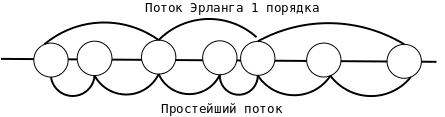

Такой поток называется *потоком Эрланга 1 порядка*. 

Очевидно, что такие действия можно обобщить, если выбирать каждую $k$ точку, то получим **поток Эрланга $k+1$-го порядка**. 

Найдем закон распределения для потока Эрланга $k$-го порядка. Пусть в момент времени $t_0$ пришла очередная учтенная в потоке Эрланга заявка, значит должно придти еще $k$ заявок, чтобы $k+1$-ю заявку мы учли в потоке Эрланга. Пусть эти заявки приходят через моменты $\tau_1, \tau_2,\ldots, \tau_k$. Значит нужно оценить вероятность, что за промежуток времени $T=\sum_{i=1}^k\tau_i$ поступит ровно $k$ заявок, а за промежуток $(T,T+dt)$ поступит одна заявка. Вероятность, что за период времени $T$ поступит $k$ заявок для простейшего потока определяется по закону Пуассона:
$P_k=\frac{\left(\lambda \cdot T\right)^k}{k!}e^{-\lambda\cdot T}$
Вероятность, что на малом отрезке поступит не более одной заявки для ординарного потока равна 1, а на отрезке длиной $dt$ вероятность, что поступит ровно одна заявка пропорциональна длине этого отрезка: $\lambda\cdot dt$.
Совместное наступление этих событий определится как:

$$\frac{\left(\lambda \cdot T\right)^k}{k!}e^{-\lambda\cdot T}\cdot \lambda\cdot dt$$
Отсюда следует, что плотность распределения вероятностей для потока Эрланга $k$-го порядка равна:

$$f_k(t)=\frac{\lambda\left(\lambda \cdot t\right)^k}{k!}e^{-\lambda\cdot t}$$

При $k=0$ получаем показательное распределение: $f_0(t)=\lambda e^{-\lambda\cdot t}$

## Преобразование Лапласа-Стилтьеса, производящие функции, их свойства

В теории массового обслуживания часто используются преобразования Лапласа, Лапласа-Стилтьеса (для неотрицательных непрерывных и непрерывно-дискретных случайных величин), а также аппарат производящих функций (для неотрицательных целочисленных случайных величин). Эти инструменты удобно использовать для инженерных расчетов моментов функций распределения таких случайных величин, которые являются суммами фиксированного или случайного числа случайных величин, что нередко встречается в стохастических моделях обслуживания. 

**Определение 8.** *Пусть $\zeta$ -случайная величина, $F(t)=P(\zeta<t)$  - функция распределения вероятностей случайной величины $\zeta$, тогда определим две функции:
$$L(F(t))=\alpha(s)=\int_0^\infty e^{-st}F(t)dt$$
$$B(F(t))=\beta(s)=\int_0^\infty e^{-st}dF(t)$$
Функция $\alpha(s)$ носит название преобразование Лапласа, функция $\beta(s)$ - носит название преобразования Лапласа-Стилтьеса.* 

Здесь переменную $s$ можно рассматривать как комплексную или действительную переменную без ограничения общности. Рассмотрим некоторые свойства этих преобразований.

**Свойство 1.** Если оба преобразования существуют, то $\beta(s)=s\alpha(s)$.

$$\beta(s)=\int_0^\infty e^{-st}dF(t)=F(t)\cdot e^{-st}|_0^\infty-\int_0^\infty F(t)d e^{-st}=0-F(0)+s\int_0^\infty e^{-st}F(t)dt=s\alpha(s)$$

**Свойство 2.** (линейность) Если $L(F_1(t))=\alpha_1(s), L(F_2(t))=\alpha_2(s), B(F_1(t))=\beta_1(s), B(F_2(t))=\beta_2(s)$, то 
 $$L(a\cdot F_1(t)+b\cdot F_2(t))=a\cdot\alpha_1(s)+b\cdot\alpha_2(s)$$
 $$B(a\cdot F_1(t)+b\cdot F_2(t))=a\cdot\beta_1(s)+b\cdot\beta_2(s)$$

$$L(a\cdot F_1(t)+b\cdot F_2(t))=\int_0^\infty e^{-st}\left(a\cdot F_1(t)+b\cdot F_2(t)\right)dt=a\int_0^\infty e^{-st}\cdot F_1(t)dt+b\int_0^\infty e^{-st}\cdot F_2(t)dt=a\cdot\alpha_1(s)+b\cdot\alpha_2(s)$$
$$B(a\cdot F_1(t)+b\cdot F_2(t))=sL(a\cdot F_1(t)+b\cdot F_2(t))=s(a\cdot\alpha_1(s)+b\cdot\alpha_2(s))=a\cdot\beta_1(s)+b\cdot\beta_2(s)$$

**Свойство 3.** (подобие) $$L(F(at))=\frac{1}{a}\cdot \alpha\left(\frac{s}{a}\right)$$

$$L(F(at))=\int_0^\infty e^{-st}F(at)dt=\frac{1}{a}\cdot \int_0^\infty e^{-\frac{s}{a}\cdot at}F(at)\cdot d(at)=\frac{1}{a}\alpha\left(\frac{s}{a}\right)$$

$$B(F(at))=s\cdot L(F(at))=\frac{s}{a}\alpha\left(\frac{s}{a}\right)=\beta\left(\frac{s}{a}\right)$$

**Свойство 4.** (затухание)
$$L\left(e^{at}\cdot F(t)\right)=\alpha(s-a)$$

$$L\left(e^{at}\cdot F(t)\right)=L\left(e^{at}\cdot F(t)\right)=\int_0^\infty e^{-st}\cdot e^{at}F(t)dt=\int_0^\infty e^{(-s+a)t}f(t)dt=\alpha(s-a)$$

$$B\left(e^{at}\cdot F(t)\right)=\int_0^\infty e^{(-s+a)t}dF(t)=\beta(s-a)$$

**Свойство 5.** (запаздывание)
$$L(F(t-\tau))=e^{-s\tau}\alpha(s)$$

$$L(F(t-\tau))=\int_0^\infty e^{-st}F(t-\tau)dt=e^{-s\tau}\int_0^\infty \frac{e^{-st}}{e^{-s\tau}}F(t-\tau)d(t-\tau)=e^{-s\tau}\int_0^\infty e^{-s(t-\tau)}F(t-\tau)d(t-\tau)=e^{-s\tau}\alpha(s)$$

$$B(F(t-\tau))=e^{-s\tau}\beta(s)$$

$$B(F(t-\tau))=\int_0^\infty e^{-st}dF(t-\tau)=e^{-s\tau}\int_0^\infty \frac{e^{-st}}{e^{-s\tau}}dF(t-\tau)=e^{-s\tau}\int_0^\infty e^{-s(t-\tau)}dF(t-\tau)=e^{-s\tau}\beta(s)$$

**Свойство 6.** (дифференцирование)

$$L(F'(t))=s\alpha(s)-F(0)$$
$$B(F'(t))=s\beta(s)-sF(0)$$

$$L(F'(t))=\int_0^\infty e^{-st}F'(t)dt=\int_0^\infty e^{-st}dF(t)=e^{-st}F(t)|_0^\infty-\int_0^\infty F(t)de^{-st}=-F(0)+s\int_0^\infty e^{-st}F(t)dt=s\alpha(s)-F(0)$$

$$B(F'(t))=sL(F'(t))=s(s\alpha(s)-F(0))=s\beta(s)-sF(0)$$

**Свойство 7.** (интегрирование)

$$L\left(\int_0^{t} F(t)dt\right)=\frac{\alpha(s)}{s}$$

Пусть $\int_0^t F(t) dt=G(t)$
$$L\left(\int_0^{t} F(t)dt\right)=\int_0^\infty e^{-st}G(t) dt=-\frac{1}{s}\int_0^\infty G(t)de^{-st}=-\frac{1}{s}\cdot\left(e^{-st}G(t)|_0^\infty-\int_0^\infty e^{-st}dG(t)\right)=-\frac{1}{s}\left(0-\int_0^\infty e^{-st}F(t)dt\right)=\frac{\alpha(s)}{s}$$

$$B\left(\int_0^{t} F(t)dt\right)=\frac{\beta(s)}{s}$$

$$B\left(\int_0^{t} F(t)dt\right)=\int_0^\infty e^{-st}d\left(\int_0^{t} F(t)dt\right)=\int_0^\infty e^{-st}F(t)dt=\alpha(s)=\frac{\beta(s)}{s}$$

Перечислим еще без доказательства ряд важных свойств.

**Свойство 8.** Если две независимые случайные величины $\zeta_1, \zeta_2$ имеют функции преобразования Лапласа-Стилтьеса $\beta_1(s),\beta_2(s)$, то случайная величина $\zeta_1+\zeta_2$ имеет преобразование Лапласа-Стилтьеса $\beta_1(s)\cdot\beta_2(s)$

**Свойство 9.**  Центральный момент $n$-го порядка $M_n(\zeta)$ случайной величины $\zeta$ с преобразованием Лапласа-Стилтьеса $\beta(s)$ определяется как:
$$M_n(\zeta)=\int_0^\infty t^n dF(t)=(-1)^n\cdot \frac{d^n\beta(s)}{ds^n}|_{s=0}$$
В частности 
$$M(\zeta)=-\beta'(0)$$
$$D(\zeta)=M(\zeta^2)-M^2(\zeta)=\beta''(0)-\left(\beta'(0)\right)^2$$

Рассмотрим примеры на использование этих свойств.

**Пример 3.** Рассчитать математическое ожидание и дисперсию для случайной величины $X$ с распределением Эрланга $k-го$ порядка. 

Выполним преобразование Лапласа над плотностью вероятности:

$$\bar{f}_k(s)=\int_0^\infty e^{-st}\frac{\lambda\left(\lambda \cdot t\right)^k}{k!}e^{-\lambda\cdot t} dt=\frac{\lambda^{k+1}}{k!}\int_0^\infty e^{-(s+\lambda)t}t^kdt=\frac{\lambda^{k+1}}{k!}\frac{k!}{(s+\lambda)^{k+1}}=\frac{\lambda^{k+1}}{(s+\lambda)^{k+1}}$$

$$M[X]=-\frac{d\bar{f}_k(s)}{ds}|_{s=0}=\frac{(k+1)}{\lambda}$$

[Wolfram](https://www.wolframalpha.com/input?i=diff%28a%5E%28k%2B1%29%2F%28s%2Ba%29%5E%28k%2B1%29%2Cs%29%3B)

$$D(X)=\left(\frac{\lambda^{k+1}}{(s+\lambda)^{k+1}}\right)''|_{s=0}-\left(\frac{k+1}{\lambda}\right)^2=\frac{(k+1)(k+2)}{\lambda^2}-\frac{(k+1)^2}{\lambda^2}=\frac{k+1}{\lambda^2}$$

[Wolfram](https://www.wolframalpha.com/input?i=diff%28diff%28a%5E%28k%2B1%29%2F%28s%2Ba%29%5E%28k%2B1%29%2Cs%29%2Cs%29%3B)

**Определение 9.** Пусть $\zeta$ неотрицательная целочисленная случайная величина, принимающая значения $0, 1, \ldots$ с вероятностями $p_0, p_1, \ldots$ соответственно, тогда **производящей функцией распределения случайной величины** называется:
$$P_{\zeta}(z)=\sum_{n=0}^\infty p_nz^n$$

**Свойства производящей функции**

1. $$P_{\zeta}(1)=1$$
2. $$M(\zeta)=P'_{\zeta}(z)|_{z=1}$$
3. $$D(\zeta)=P''_{\zeta}(z)|_{z=1}+P'_{\zeta}(z)|_{z=1}-\left(P'_{\zeta}(z)\right)^2|_{z=1}$$
4. $$p_n=\frac{1}{n!}\frac{d^n P_{\zeta}(z)}{dz^n}|_{z=0}$$
5. Если $\zeta_1, \zeta_2$ две независимые целочисленные случайные неотрицательные величины, то
$$P_{\zeta_1+\zeta_2}(z)=P_{\zeta_1}(z)\cdot P_{\zeta_2}(z)$$

Рассмотрим также ряд примеров.

**Пример 4.** 

На вход системы поступает пуассоновский поток заявок интенсивности $\lambda$. Обозначив $\mu$ число заявок, поступающих за время $(0, t)$. Найти производящую функцию случайной величины $\mu$, ее математическое ожидание и дисперсию.


**Решение.**

$$P_{\mu}(z)=\sum_{n=0}^\infty p_n z^n=\sum_{n=0}^\infty\frac{(\lambda t)^n}{n!}e^{-\lambda t}z^n=e^{-\lambda t}\cdot e^{\lambda t z}=e^{-\lambda t(1-z)}$$

$$M(\mu)=P'_{\mu}(z)|_{z=1}=\lambda t e^{-\lambda t(1-z)}|_{z=1}=\lambda\cdot t$$

$$D(\mu)=P''_{\zeta}(z)|_{z=1}+P'_{\zeta}(z)|_{z=1}-\left(P'_{\zeta}(z)\right)^2|_{z=1}=(\lambda t)^2+\lambda t-(\lambda t)^2=\lambda t$$